# Stemming i lematyzacja

## Wprowadzenie



*   **stemming** — operacja polegająca na wyodrębnieniu rdzenia słowa poprzez odcięcie od formy tekstowej końcówki fleksyjnej, np.
  * **brąz**owy, **brąz**owa, **brąz**owe => **brąz**,
  * **farba**, **farb**y => **farba**,
  * człowiek, ludzie => ?
*   **lematyzacja** — operacja polegająca na sprowadzeniu słowa do formy bazowej, np.:
  * brązowy, brązowa, brązowe => **brązowy**,
  * farba, farby => **farba**,
  * człowiek, ludzie => **człowiek**.




## Stemming w NLTK (j. angielski)



*   **PorterStemmer** — implementacja algorytmu Portera z 1980, opera się na grupy reguł odcinania końcówek.
*   **SnowballStemmer** — znana także jako Porter2, ulepszona wersja algorymtu Portera, stosuje bardziej agresywne reguły odcinania końcówek. Dostępny dla 15 języków (m.in. angielski, niemiecki, hiszpański). **Nie obsługuje j. polskiego**.



Przykład grupy reguł dla liczby mnogiej:
  * `sses -> ss`,  np. `classes -> class`,
  * `ies -> i`, np. `ponies -> poni`,
  * `ss` -> `ss`, np. `caress -> caress`,
  * `s -> `, np. `cats -> cat`,






In [ ]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

In [ ]:
words = ["connecting", "connects", "connection", "connected"]

print([stemmer.stem(word) for word in words])

['connect', 'connect', 'connect', 'connect']


## Lematyzacja w spaCy (j. polski)

### Przygotowanie

*   Będziemy korzystać z modelu pl_core_news_sm
*   Model wymaga spaCy w wersji 2.3

In [ ]:
!pip install spacy -U

     |████████████████████████████████| 10.4MB 5.2MB/s 
     |████████████████████████████████| 1.1MB 47.0MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
!python -m spacy download pl_core_news_sm
!python -m spacy link pl_core_news_sm pl_core_news_sm -f

     |████████████████████████████████| 48.7MB 93.2MB/s 
  Created wheel for pl-core-news-sm: filename=pl_core_news_sm-2.3.0-cp36-none-any.whl size=48719489 sha256=0e1a70814f20edec182c53bddc5a53e74123ac05f37eaba173750d72d7a3ff92
  Stored in directory: /tmp/pip-ephem-wheel-cache-r418c96b/wheels/ce/7a/53/aab09c53056da9fefa67b44d57202e9bd556825e12ca89fff1
Successfully built pl-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pl_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pl_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pl_core_news_sm
You can now load the model via spacy.load('pl_core_news_sm')


In [ ]:
import spacy
nlp = spacy.load("pl_core_news_sm")

### Przykłady

In [ ]:
doc = nlp("jadę jedziemy jedziesz jedziecie")

for t in doc:
  print(f"{t.text:<10} => {t.lemma_:<10}")

jadę       => jechać    
jedziemy   => jechać    
jedziesz   => jechać    
jedziecie  => jedziecie 


In [ ]:
doc = nlp("Dokąd jedziecie w najbliższy weekend?")

for t in doc:
  print(f"{t.text:<10} => {t.lemma_:<10}")

Dokąd      => dokąd     
jedziecie  => jechać    
w          => w         
najbliższy => bliski    
weekend    => weekend   
?          => ?         


In [ ]:
doc = nlp("Mamy kwiaty dla mamy.")

for t in doc:
  print(f"{t.text:<10} => {t.lemma_:<10}")

Mamy       => mieć      
kwiaty     => kwiat     
dla        => dla       
mamy       => mama      
.          => .         


In [ ]:
doc = nlp("Na przystanku stali ludzie.")

for t in doc:
  print(f"{t.text:<10} => {t.lemma_:<10}")

Na         => na        
przystanku => przystanek
stali      => stać      
ludzie     => lud       
.          => .         


In [ ]:
for t in nlp("liśćmi liście liscie"):
  print(f"{t.orth_:<8} => {t.lemma_:<8}")

liśćmi   => liść    
liście   => liść    
liscie   => liscie  


### Lematyzacja, a potok przetwarzania

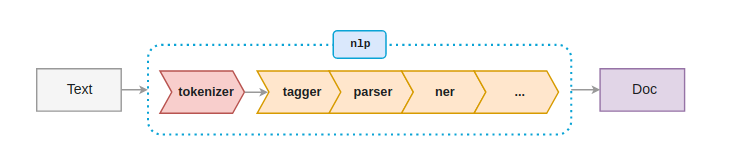

In [ ]:
doc = nlp("Mamy kwiaty dla mamy.", disable=["tagger", "parser", "ner"])

for t in doc:
  print(f"{t.text:<10} => {t.lemma_:<10}")

Mamy       => mamy      
kwiaty     => kwiaty    
dla        => dla       
mamy       => mamy      
.          => .         


In [ ]:
doc = nlp("Mamy kwiaty dla mamy.", disable=["parser", "ner"])

for t in doc:
  print(f"{t.text:<10} => {t.lemma_:<10}")

Mamy       => mieć      
kwiaty     => kwiat     
dla        => dla       
mamy       => mama      
.          => .         


### Procedura lematyzacji

1.   Model wykorzystuje słowniki lematów podzielone na klasy gramatyczne — uproszczona postać słownika morfologicznego Morfeusz SGJP (http://morfeusz.sgjp.pl).
2.   Moduł `tagger` określa klasę gramatyczną dla słowa (VERB, NOUN, ADJ, itd)
3.   Lematyzator sprawdza, czy w słowniku dla danej klasy gramatycznej istnieje określona forma tekstowa. Jeżeli tak, to zostaje przypisany lemat ze słownika. Jeżeli nie, to zostaje przypisana forma tekstowa przekształcona do małych liter.



In [ ]:
doc = nlp("Mamy kwiaty dla mamy.", disable=["parser", "ner"])

for t in doc:
  print(f"{t.text:<10} => {t.pos_:<8} => {t.lemma_:<10}")

Mamy       => VERB     => mieć      
kwiaty     => NOUN     => kwiat     
dla        => ADP      => dla       
mamy       => NOUN     => mama      
.          => PUNCT    => .         


In [ ]:
doc = nlp("Na przystanku stali ludzie.")

for t in doc:
  print(f"{t.text:<10} => {t.pos_:<8} => {t.lemma_:<10}")

Na         => ADP      => na        
przystanku => NOUN     => przystanek
stali      => VERB     => stać      
ludzie     => NOUN     => lud       
.          => PUNCT    => .         


Interpretacje słowa `ludzie` w słowniku Morfeusz SGJP (http://morfeusz.sgjp.pl/demo/).

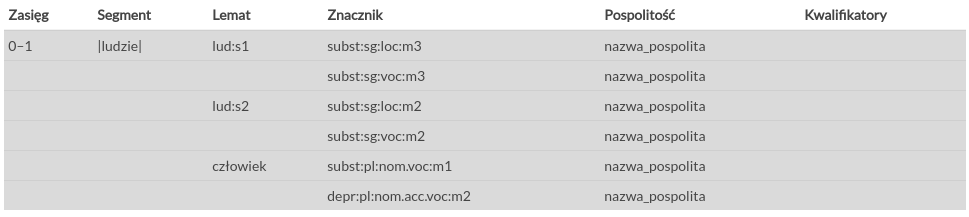

Pełne znaczniki morfologiczne zostały wykorzystane w modelu IPI.

## Podsumowanie



1.   **Stemming** i **lematyzacja** pozwalają na redukcję różnorodności form tekstowych — różne formy fleksyjne tego samego słowa sprowadzane są do tej samej postaci.
2.   **Stemming** polega na wydrębnieniu ze słowa jego rdzenia, a **lematyzacja** polega na sprowadzeniu słowa do formy bazowej.
3.   Lematyzacja w spaCy dla j. polskiego:
  *   Lematyzator wykorzystuje wynik modułu `tagger` oraz uproszczoną postać słownika morfologicznego Morfeusz SGJP.
  *   Dla słów, które nie zostaną odnalezione w słowniku, jako lemat przypisywana jest forma tekstowa sprowadzona do małych liter.
  *   Uproszczona reprezentacja słownika morfologicznego powoduje, że modele j. polskiego z oficjalnego repozytorium spaCy nie poradzą sobie z rozsztrzygnięciem między różnymi interpretacjami słowa w obrębie klasy gramatycznej (przykład ze słowem `ludzie`).




